<a href="https://colab.research.google.com/github/cbeuter/CSL/blob/main/Estatistica_dinamica_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estatistica** Dinâmica

Algumas coletas de dados em tempo real por sistemas embarcadaos, eventualmente precisam apresentar resultados estatístico dinamicamente, que devido a limitação de memória, não podem ter a capacidade de guardar os dados. Um *stream* de dados não permite locação de dados para cálculo posterior. Um exemplo típico é a velocidade média e rendimento (km/litro) dos automóveis.

O objetivo deste tutorial é apresentar de maneira simples, uma forma de fazer estes tipos de cálculos, dinamicamente. Ademais, a proposta incluir eliminar dados fora do padrão. Geralmente devido a ruido inserido no sistema e que trariam grande desvirtuação nos dados estatísticos.

## Média

In [21]:
def calcular_media_dinamica(lista_numeros):
    total = 0
    count = 0
    for numero in lista_numeros:
        total += numero
        count += 1
        media_atual = total / count
        yield media_atual

# Exemplo de uso
lista_numeros = [10, 20, 30, 40, 50]
gerador_media = calcular_media_dinamica(lista_numeros)

for media in gerador_media:
    print(f"Média até agora: {media}")

Média até agora: 10.0
Média até agora: 15.0
Média até agora: 20.0
Média até agora: 25.0
Média até agora: 30.0


Agora generalizando as medições

In [30]:
import random
tam = 15
lista_numeros = [random.randint(1, 100) for _ in range(tam)]
lista_numeros


[54, 53, 100, 35, 29, 64, 98, 22, 100, 19, 48, 25, 56, 34, 79]

Atualizando a forma de calcular

In [31]:
def calcular_media_dinamica(lista):
    soma = 0
    for i, numero in enumerate(lista, start=1):
        soma += numero
        media_atual = soma / i
        print(f"Iteração {i}, Número: {numero}, Média até agora: {media_atual}")

# Demonstrando o funcionamento da função com a lista gerada anteriormente
calcular_media_dinamica(lista_numeros)


Iteração 1, Número: 54, Média até agora: 54.0
Iteração 2, Número: 53, Média até agora: 53.5
Iteração 3, Número: 100, Média até agora: 69.0
Iteração 4, Número: 35, Média até agora: 60.5
Iteração 5, Número: 29, Média até agora: 54.2
Iteração 6, Número: 64, Média até agora: 55.833333333333336
Iteração 7, Número: 98, Média até agora: 61.857142857142854
Iteração 8, Número: 22, Média até agora: 56.875
Iteração 9, Número: 100, Média até agora: 61.666666666666664
Iteração 10, Número: 19, Média até agora: 57.4
Iteração 11, Número: 48, Média até agora: 56.54545454545455
Iteração 12, Número: 25, Média até agora: 53.916666666666664
Iteração 13, Número: 56, Média até agora: 54.07692307692308
Iteração 14, Número: 34, Média até agora: 52.642857142857146
Iteração 15, Número: 79, Média até agora: 54.4


Formatando a saida para duas casas decimais

In [32]:
def calcular_media_dinamica_formatada(lista):
    soma = 0
    for i, numero in enumerate(lista, start=1):
        soma += numero
        media_atual = soma / i
        print(f"Iteração {i}, Número: {numero}, Média até agora: {media_atual:.2f}")

# Demonstrando o funcionamento da função com a formatação da média
calcular_media_dinamica_formatada(lista_numeros)


Iteração 1, Número: 54, Média até agora: 54.00
Iteração 2, Número: 53, Média até agora: 53.50
Iteração 3, Número: 100, Média até agora: 69.00
Iteração 4, Número: 35, Média até agora: 60.50
Iteração 5, Número: 29, Média até agora: 54.20
Iteração 6, Número: 64, Média até agora: 55.83
Iteração 7, Número: 98, Média até agora: 61.86
Iteração 8, Número: 22, Média até agora: 56.88
Iteração 9, Número: 100, Média até agora: 61.67
Iteração 10, Número: 19, Média até agora: 57.40
Iteração 11, Número: 48, Média até agora: 56.55
Iteração 12, Número: 25, Média até agora: 53.92
Iteração 13, Número: 56, Média até agora: 54.08
Iteração 14, Número: 34, Média até agora: 52.64
Iteração 15, Número: 79, Média até agora: 54.40


Incluir números reais, com pontos flutuantes

In [35]:
# Gerando uma lista de números reais (com decimais)
lista_numeros_reais = [random.uniform(1, 100) for _ in range(10)]

# Calculando a média dinâmica de números reais com formatação
def calcular_media_dinamica_reais(lista):
    soma = 0
    resultados = []
    for i, numero in enumerate(lista, start=1):
        soma += numero
        media_atual = soma / i
        resultados.append(f"Iteração {i}, Número: {numero:.2f}, Média até agora: {media_atual:.2f}")
    return resultados, lista

resultados_reais, lista_numeros_reais_formatada = calcular_media_dinamica_reais(lista_numeros_reais)

lista_numeros_reais_formatada, resultados_reais


([66.9734220095483,
  34.35428471628422,
  60.86245872772043,
  95.33676589130609,
  49.14221090122884,
  64.13697210419409,
  48.6242237641596,
  93.84208794924864,
  34.08689292108191,
  76.02000101413915],
 ['Iteração 1, Número: 66.97, Média até agora: 66.97',
  'Iteração 2, Número: 34.35, Média até agora: 50.66',
  'Iteração 3, Número: 60.86, Média até agora: 54.06',
  'Iteração 4, Número: 95.34, Média até agora: 64.38',
  'Iteração 5, Número: 49.14, Média até agora: 61.33',
  'Iteração 6, Número: 64.14, Média até agora: 61.80',
  'Iteração 7, Número: 48.62, Média até agora: 59.92',
  'Iteração 8, Número: 93.84, Média até agora: 64.16',
  'Iteração 9, Número: 34.09, Média até agora: 60.82',
  'Iteração 10, Número: 76.02, Média até agora: 62.34'])

Criado  uma semente para reproduzir os mesmos dados e conferir resultados

In [37]:
# Definindo uma semente para a geração de números reais
random.seed(42)

# Gerando uma nova lista de números reais (com decimais) usando a semente definida
lista_numeros_reais_semente = [random.uniform(1, 100) for _ in range(10)]

# Calculando a média dinâmica de números reais com formatação usando a nova lista
resultados_reais_semente, lista_numeros_reais_semente_formatada = calcular_media_dinamica_reais(lista_numeros_reais_semente)

lista_numeros_reais_semente_formatada, resultados_reais_semente


([64.30325304733049,
  3.4760647670440266,
  28.227902518542805,
  23.097863076733454,
  73.91065020223722,
  67.99324925486822,
  89.32577720277969,
  9.606944430312199,
  42.77026014884177,
  3.949924724368964],
 ['Iteração 1, Número: 64.30, Média até agora: 64.30',
  'Iteração 2, Número: 3.48, Média até agora: 33.89',
  'Iteração 3, Número: 28.23, Média até agora: 32.00',
  'Iteração 4, Número: 23.10, Média até agora: 29.78',
  'Iteração 5, Número: 73.91, Média até agora: 38.60',
  'Iteração 6, Número: 67.99, Média até agora: 43.50',
  'Iteração 7, Número: 89.33, Média até agora: 50.05',
  'Iteração 8, Número: 9.61, Média até agora: 44.99',
  'Iteração 9, Número: 42.77, Média até agora: 44.75',
  'Iteração 10, Número: 3.95, Média até agora: 40.67'])

Com a semente 42 exemplificada, a lista deve ser

[64.30,3.48,28.23,23.10,73.91,67.99,89.33,9.61,42.77,3.95]
e (...)

Iteração 10, Número: 3.95, Média até agora: **40.67**


## Desvio Padrão

In [38]:
def calcular_media_desvio_padrao_dinamico(lista):
    soma = 0
    soma_quadrados = 0
    resultados = []
    for i, numero in enumerate(lista, start=1):
        soma += numero
        soma_quadrados += numero ** 2
        media_atual = soma / i
        variancia = (soma_quadrados / i) - (media_atual ** 2)
        desvio_padrao = variancia ** 0.5
        resultados.append(f"Iteração {i}, Número: {numero:.2f}, Média: {media_atual:.2f}, Desvio Padrão: {desvio_padrao:.2f}")
    return resultados

# Calculando a média e o desvio padrão dinamicamente usando a lista de números reais com semente
resultados_media_desvio_padrao = calcular_media_desvio_padrao_dinamico(lista_numeros_reais_semente)

resultados_media_desvio_padrao


['Iteração 1, Número: 64.30, Média: 64.30, Desvio Padrão: 0.00',
 'Iteração 2, Número: 3.48, Média: 33.89, Desvio Padrão: 30.41',
 'Iteração 3, Número: 28.23, Média: 32.00, Desvio Padrão: 24.98',
 'Iteração 4, Número: 23.10, Média: 29.78, Desvio Padrão: 21.97',
 'Iteração 5, Número: 73.91, Média: 38.60, Desvio Padrão: 26.42',
 'Iteração 6, Número: 67.99, Média: 43.50, Desvio Padrão: 26.49',
 'Iteração 7, Número: 89.33, Média: 50.05, Desvio Padrão: 29.30',
 'Iteração 8, Número: 9.61, Média: 44.99, Desvio Padrão: 30.50',
 'Iteração 9, Número: 42.77, Média: 44.75, Desvio Padrão: 28.76',
 'Iteração 10, Número: 3.95, Média: 40.67, Desvio Padrão: 29.90']

A equação para calcular o desvio padrão de uma série de números é expressa da seguinte forma em LaTeX:

$$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2}$$

Onde:
- $\sigma$ é o desvio padrão,
- $N$ é o número total de observações na série,
- $x_i$ representa cada observação na série,
- $\mu$ é a média da série de números,
- $\sum$ denota a soma para todas as observações.

Para calcular o desvio padrão de forma dinâmica, conforme realizado anteriormente, foi adaptado este conceito para calcular a média ($\mu$) e a soma dos quadrados das diferenças entre cada observação e a média ($\sum(x_i - \mu)^2$) a cada iteração, permitindo o cálculo incremental do desvio padrão.

## Diferença entre Desvios padrão

O cálculo realizado anteriormente refere-se ao desvio padrão populacional. No cálculo do desvio padrão populacional, usamos a média da população (total dos elementos) e dividimos a soma dos quadrados das diferenças entre cada valor e a média pelo número total de elementos.

A equação para o desvio padrão populacional ($\sigma$) é:

$$
\sigma = \sqrt{\frac{\sum{(x_i - \mu)^2}}{N}}
$$

onde:
- $x_i$ representa cada valor na população,
- $\mu$ é a média da população,
- $N$ é o número total de elementos na população,
- $\sigma$ é o desvio padrão populacional.

Para o desvio padrão amostral, que é usado quando estamos lidando com uma amostra de uma população maior, a fórmula é ligeiramente diferente. Nesse caso, dividimos a soma dos quadrados das diferenças não por $N$ mas por $N-1$ para obter uma estimativa mais precisa do desvio padrão da população com base em uma amostra. A fórmula do desvio padrão amostral ($s$) é:

$$
s = \sqrt{\frac{\sum{(x_i - \bar{x})^2}}{N-1}}
$$

onde $\bar{x}$ é a média da amostra.


Fazendo um comparativo entre as duas equações.

In [41]:
import pandas as pd

def calcular_desvios(lista):
    soma = 0
    soma_quadrados = 0
    resultados = []
    for i, numero in enumerate(lista, start=1):
        soma += numero
        soma_quadrados += numero ** 2
        media_atual = soma / i
        variancia_populacional = (soma_quadrados / i) - (media_atual ** 2)
        desvio_padrao_populacional = variancia_populacional ** 0.5
        if i > 1:  # O desvio padrão amostral não é definido para uma única amostra
            variancia_amostral = (soma_quadrados - 2*media_atual*soma + i*(media_atual**2)) / (i - 1)
            desvio_padrao_amostral = variancia_amostral ** 0.5
        else:
            desvio_padrao_amostral = float('nan')  # Não aplicável para a primeira iteração
        resultados.append({
            'Iteração': i,
            'Número': numero,
            'Desvio Padrão Populacional': desvio_padrao_populacional,
            'Desvio Padrão Amostral': desvio_padrao_amostral
        })
    return pd.DataFrame(resultados)

# Calculando desvios padrão populacional e amostral para cada iteração
dados = [64.30, 3.48, 28.23, 23.10, 73.91, 67.99, 89.33, 9.61, 42.77, 3.95]
df_desvios = calcular_desvios(dados)

df_desvios


,Iteração,Número,Desvio Padrão Populacional,Desvio Padrão Amostral
0,1,64.30,0.000000,NaN
1,2,3.48,30.410000,43.006234
2,3,28.23,24.972607,30.585072
3,4,23.10,21.967847,25.366285
4,5,73.91,26.413963,29.531709
5,6,67.99,26.483018,29.010693
6,7,89.33,29.297255,31.644652
7,8,9.61,30.494205,32.599676
8,9,42.77,28.758705,30.503213
9,10,3.95,29.902339,31.519833


Observando primeiramente os dados apresentados

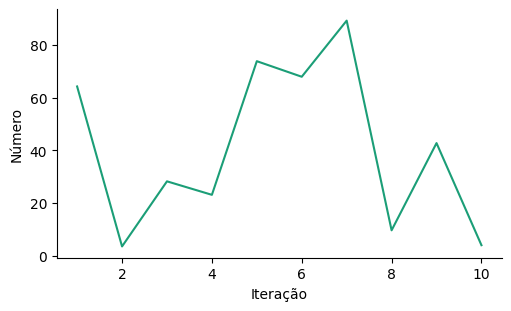

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Iteração']
  ys = series['Número']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(5,3), layout='constrained')
df_sorted = df_desvios.sort_values('Iteração', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Iteração')
_ = plt.ylabel('Número')

Juntando os valores dos dois tipos de desvios

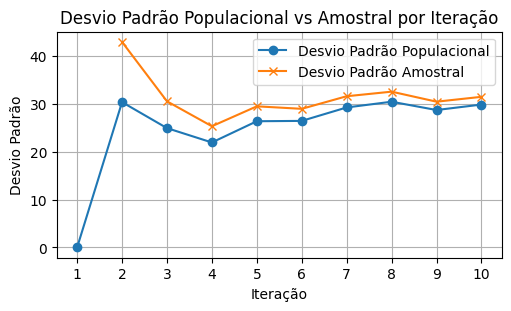

In [45]:
import matplotlib.pyplot as plt

# Plotando o gráfico de linha para os desvios padrão populacional e amostral
plt.figure(figsize=(5,3),  layout='constrained')
plt.plot(df_desvios['Iteração'], df_desvios['Desvio Padrão Populacional'], label='Desvio Padrão Populacional', marker='o')
plt.plot(df_desvios['Iteração'], df_desvios['Desvio Padrão Amostral'], label='Desvio Padrão Amostral', marker='x')

plt.title('Desvio Padrão Populacional vs Amostral por Iteração')
plt.xlabel('Iteração')
plt.ylabel('Desvio Padrão')
plt.legend()
plt.grid(True)
plt.xticks(df_desvios['Iteração'])
plt.show()


No gráfico acima, você pode ver a comparação entre o desvio padrão populacional e o desvio padrão amostral a cada iteração para o conjunto de dados fornecido. O desvio padrão populacional é calculado usando todos os elementos do conjunto de dados como se representassem a população inteira, enquanto o desvio padrão amostral é calculado como se os dados representassem uma amostra de uma população maior.

O gráfico mostra como cada tipo de desvio padrão evolui à medida que mais dados são considerados (a cada iteração). Note que o desvio padrão amostral começa a ser calculado a partir da segunda iteração, pois não é definido para uma única amostra. ​

## Exemplo de Importância: medição de temperatura


O desvio padrão é uma medida estatística que quantifica a dispersão ou variação de um conjunto de valores. Na medição da temperatura ao longo do tempo, o desvio padrão tem várias aplicações importantes, tais como:

1. **Avaliar a Variabilidade:** O desvio padrão permite avaliar quão variáveis são as temperaturas durante um determinado período. Um desvio padrão baixo indica que as temperaturas estão agrupadas de perto em torno da média, sugerindo condições climáticas estáveis. Por outro lado, um desvio padrão alto indica uma grande variação nas temperaturas, sugerindo condições climáticas mais variáveis ou extremas.

2. **Comparar Condições Climáticas:** O desvio padrão pode ser usado para comparar a variabilidade climática entre diferentes locais ou períodos. Por exemplo, pode-se comparar a estabilidade das temperaturas entre o verão e o inverno ou entre diferentes regiões geográficas.

3. **Identificar Anomalias:** Ao analisar o desvio padrão das temperaturas ao longo do tempo, é possível identificar períodos de anomalia climática, como ondas de calor ou frio extremo. Períodos com um desvio padrão significativamente mais alto do que a média podem indicar eventos climáticos extremos.

4. **Previsão e Modelagem Climática:** O desvio padrão é um componente chave na modelagem estatística e na previsão do clima. Entender a variabilidade histórica das temperaturas pode ajudar na criação de modelos climáticos mais precisos e na previsão de futuras condições climáticas.

5. **Planejamento e Tomada de Decisão:** Para agricultura, construção, turismo e outras indústrias sensíveis ao clima, entender a variabilidade da temperatura é crucial para o planejamento e a tomada de decisão. O desvio padrão fornece informações valiosas sobre a expectativa de variação climática, que pode afetar tudo, desde a escolha das culturas até a programação de eventos ao ar livre.

O desvio padrão fornece insights cruciais sobre a variabilidade e a estabilidade das temperaturas ao longo do tempo, o que é essencial para uma ampla gama de aplicações, desde a análise climática e ambiental até o planejamento econômico e a gestão de riscos.

# Atividade 01

1. Codifique a média dinâmica no simulador do Arduino
2. Codifique o desvio padrão populacional dinâmico no simulador do Arduino

# Outliers

## O que são outliers?

Outliers, ou valores atípicos, são pontos de dados que se desviam significativamente do padrão observado em um conjunto de dados. Eles são notavelmente diferentes dos outros pontos de dados, estando muito acima ou abaixo da maioria dos valores no conjunto. A presença de outliers pode ser devido a variabilidade no processo de medição, erros experimentais, ou podem indicar um fenômeno real e significativo.

Existem várias características e implicações importantes dos outliers:

1. **Causas**: Outliers podem resultar de erros de medição ou entrada de dados, variações naturais nos dados, ou podem indicar uma mudança real no processo sendo observado. Identificar a causa dos outliers é crucial para determinar como tratá-los na análise de dados.

2. **Impacto na Análise de Dados**: Outliers podem ter um impacto significativo em estatísticas resumidas, como a média e o desvio padrão, levando a interpretações potencialmente enganosas dos dados. Por exemplo, um único outlier alto pode aumentar a média, sugerindo erroneamente que os valores típicos são maiores do que realmente são.

3. **Detecção**: A detecção de outliers pode ser feita através de vários métodos, incluindo análise gráfica (como boxplots), medidas estatísticas (como o escore Z ou o teste de Grubbs) e técnicas de mineração de dados.

4. **Tratamento**: Uma vez identificados, os outliers podem ser tratados de várias maneiras, dependendo da causa e do objetivo da análise. As opções incluem removê-los, ajustar os valores, ou realizar uma análise separada para entender melhor seu impacto e origem.

5. **Importância**: Apesar de serem frequentemente vistos como problemáticos, os outliers podem também fornecer insights valiosos sobre o processo ou fenômeno estudado. Eles podem indicar erros que precisam ser corrigidos, ou revelar novas oportunidades para pesquisa e descoberta.

Portanto, a identificação e o tratamento adequados de outliers são etapas essenciais na análise de dados, garantindo a precisão e a validade dos resultados obtidos.

## Exemplo de outliers

In [46]:
import numpy as np

# Gerando um conjunto de dados com 10 medidas
np.random.seed(0)  # Para reprodutibilidade
dados = np.random.normal(50, 15, 100)  # 100 pontos de dados com média 50 e desvio padrão 15

# Introduzindo outliers manualmente
outliers = np.array([150, 160, 170, 180, 190, 200, 210, 220, 230, 240])
dados_com_outliers = np.concatenate((dados, outliers))

# Cálculo da média e do desvio padrão antes e depois de adicionar outliers
media_original = np.mean(dados)
desvio_padrao_original = np.std(dados)
media_com_outliers = np.mean(dados_com_outliers)
desvio_padrao_com_outliers = np.std(dados_com_outliers)

media_original, desvio_padrao_original, media_com_outliers, desvio_padrao_com_outliers


(50.89712023301727, 15.118233670748696, 63.99738203001571, 44.709633291558724)

Para exemplificar o impacto dos outliers em um conjunto de dados, primeiro geramos 100 pontos de dados com uma distribuição normal, tendo média de 50 e desvio padrão de 15. Em seguida, adicionamos manualmente 10 medidas outliers (150, 160, 170, 180, 190, 200, 210, 220, 230, 240) ao conjunto de dados.

Antes de adicionar os outliers, a média do conjunto de dados era aproximadamente 50.90, e o desvio padrão era aproximadamente 15.12. Após a inclusão dos outliers, a média aumentou para aproximadamente 64.00, e o desvio padrão aumentou significativamente para aproximadamente 44.71.

Este exemplo demonstra como a presença de outliers pode afetar as medidas de tendência central e dispersão de um conjunto de dados, distorcendo a representação dos dados "típicos" e aumentando a variabilidade percebida.

## Como calcular

Primeramente entendendo o percentil

Para o conjunto de 20 números gerados aleatoriamente:

\[74.37, 40.82, 42.08, 33.91, 62.98, 15.48, 76.17, 38.58, 54.79, 46.26, 71.93, 19.10, 45.16, 44.24, 67.01, 33.50, 47.41, 36.83, 50.63, 58.74\]

O percentil 25% (também conhecido como primeiro quartil, Q1) é calculado como o valor abaixo do qual 25% das observações no conjunto de dados caem. Para este conjunto de dados, o percentil 25% é:

\[38.14\]

Isso significa que 25% dos valores no conjunto de dados são menores ou iguais a 38.14. O cálculo do percentil 25% ajuda a entender a distribuição dos dados, fornecendo um ponto de referência para comparar os valores individuais e entender a dispersão dos dados na parte inferior da distribuição.

In [50]:
# Gerando 20 números aleatórios
np.random.seed(1)  # Garantindo reprodutibilidade
dados_20_numeros = np.random.normal(50, 15, 20)  # 20 pontos de dados com média 50 e desvio padrão 15

# Calculando o percentil 25%
percentil_25 = np.percentile(dados_20_numeros, 25)

dados_20_numeros, percentil_25


(array([74.36518045, 40.8236538 , 42.07742372, 33.90547067, 62.98111444,
        15.47691955, 76.17217646, 38.58189649, 54.78558644, 46.25944437,
        71.93161906, 19.09788936, 45.16374194, 44.23918468, 67.00654164,
        33.50163099, 47.41357689, 36.83212373, 50.6332062 , 58.74222821]),
 38.14445329772495)

In [51]:
# para melhor verificar, segue
# Ordenando os 20 números gerados
dados_20_numeros_ordenados = np.sort(dados_20_numeros)

dados_20_numeros_ordenados


array([15.47691955, 19.09788936, 33.50163099, 33.90547067, 36.83212373,
       38.58189649, 40.8236538 , 42.07742372, 44.23918468, 45.16374194,
       46.25944437, 47.41357689, 50.6332062 , 54.78558644, 58.74222821,
       62.98111444, 67.00654164, 71.93161906, 74.36518045, 76.17217646])

Note que o número 38,14 está na posição de 25% da população de dados.

---

Calcular ou identificar outliers em um conjunto de dados geralmente envolve determinar quais pontos de dados desviam significativamente dos outros valores. Existem várias técnicas para isso, algumas das mais comuns incluem:

### 1. Método do Intervalo Interquartílico (IQR)
O IQR é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). Pontos de dados que estão abaixo de $Q1 - 1.5 \times IQR$ ou acima de $Q3 + 1.5 \times IQR$ são frequentemente considerados outliers.

#### Passos para calcular:
- Encontre o primeiro quartil (Q1) e o terceiro quartil (Q3) dos dados.
- Calcule o IQR ($Q3 - Q1$).
- Determine os limites inferior ($Q1 - 1.5 \times IQR$) e superior ($Q3 + 1.5 \times IQR$) para outliers.
- Qualquer ponto de dados fora desses limites pode ser considerado um outlier.



### 2. Escore Z
O escore Z é uma medida que descreve a posição de um ponto de dados em termos de quantos desvios padrões estão distantes da média. Um escore Z com valor absoluto maior que 2 ou 3 (dependendo do critério) é frequentemente considerado um outlier.

#### Passos para calcular:
- Calcule a média ($\mu$) e o desvio padrão ($\sigma$) do conjunto de dados.
- Para cada ponto de dados \(x\), calcule o escore Z ($Z = \frac{x - \mu}{\sigma}$).
- Pontos de dados com $|Z| > 2$ (ou 3) são considerados outliers.



### 3. Métodos Gráficos
Técnicas gráficas como boxplots podem visualizar potenciais outliers. Em um boxplot, pontos de dados fora dos bigodes (as linhas que se estendem do quartil superior e inferior até os valores máximos e mínimos, excluindo outliers) são considerados outliers.


### Exemplo em Python usando o Método IQR:
Vamos exemplificar o uso do método IQR para identificar outliers em um conjunto de dados hipotético.

Usando o método do Intervalo Interquartílico (IQR) para identificar outliers, os valores identificados como outliers no conjunto de dados hipotético são:

\[150, 160, 170, 180, 190, 200, 210, 220, 230, 240\]

Esses são exatamente os valores que foram manualmente introduzidos como outliers, demonstrando a eficácia do método IQR para identificar pontos de dados que desviam significativamente dos demais valores no conjunto.

In [47]:
# Exemplo de cálculo de outliers usando o método IQR

# Calculando Q1, Q3 e IQR
Q1 = np.percentile(dados, 25)
Q3 = np.percentile(dados, 75)
IQR = Q3 - Q1

# Determinando os limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando outliers
outliers_identificados = dados_com_outliers[(dados_com_outliers < limite_inferior) | (dados_com_outliers > limite_superior)]

outliers_identificados


array([150., 160., 170., 180., 190., 200., 210., 220., 230., 240.])

### Exemplo, usando o Escore Z para os 20 valores

In [52]:
# Calculando a média e o desvio padrão dos 20 números
media = np.mean(dados_20_numeros_ordenados)
desvio_padrao = np.std(dados_20_numeros_ordenados)

# Calculando o escore Z para cada número
escores_z = (dados_20_numeros_ordenados - media) / desvio_padrao

# Identificando outliers com |escore Z| > 2
outliers_escore_z = dados_20_numeros_ordenados[np.abs(escores_z) > 2]

outliers_escore_z


array([], dtype=float64)

Usando o método do Escore Z para identificar outliers nos 20 números ordenados, não foram encontrados outliers com base no critério de que valores com um escore Z com valor absoluto maior que 2 são considerados outliers. Isso significa que, nesse conjunto específico de dados, todos os pontos estão dentro de duas desvios padrões da média, e portanto, não há valores que desviam significativamente do resto do conjunto a ponto de serem considerados outliers segundo esse critério.

Para os mesmos 20 valores, incluindo alguns dados hipotéticos e verificando

In [56]:
np.random.seed(1)  # Garantindo reprodutibilidade
dados_20_numeros = np.random.normal(50, 15, 20)  # 20 pontos de dados com média 50 e desvio padrão 15

dados_20_numeros

outliers
outliers = np.array([150, 160, 170]) # 3 valores
dados_com_outliers = np.concatenate((dados_20_numeros, outliers))

dados_20_numeros = dados_com_outliers  #novo valor, com outliers

# Calculando a média e o desvio padrão dos 20 números
media = np.mean(dados_com_outliers)
desvio_padrao = np.std(dados_com_outliers)

# Calculando o escore Z para cada número
escores_z = (dados_com_outliers - media) / desvio_padrao

# Identificando outliers com |escore Z| > 2
outliers_escore_z = dados_com_outliers[np.abs(escores_z) > 2]

outliers_escore_z

array([150., 160., 170.])

Valores de outliers encontrados com o escore Z

# Atividade 02

1. Com as medidas apresentadas no uso de semente (seed) para média dinâmica, verificar se existe algum outlier

In [91]:
# dados com uso de semente
random.seed(42)
lista_numeros_reais_semente = [random.uniform(1, 100) for _ in range(10)]
lista_numeros_reais_semente

[64.30325304733049,
 3.4760647670440266,
 28.227902518542805,
 23.097863076733454,
 73.91065020223722,
 67.99324925486822,
 89.32577720277969,
 9.606944430312199,
 42.77026014884177,
 3.949924724368964]

## Resposta 01

In [92]:
# Convertendo a lista para um array do NumPy
lista_numeros_reais_semente_array = np.array(lista_numeros_reais_semente)

# Calculando a média e o desvio padrão dos números reais
media_reais = np.mean(lista_numeros_reais_semente_array)
desvio_padrao_reais = np.std(lista_numeros_reais_semente_array)

# Calculando o escore Z para cada número real
escores_z_reais = (lista_numeros_reais_semente_array - media_reais) / desvio_padrao_reais

# Identificando outliers com |escore Z| > 2 para os números reais
outliers_escore_z_reais = lista_numeros_reais_semente_array[np.abs(escores_z_reais) > 2]

outliers_escore_z_reais


array([], dtype=float64)

Não foram encontrados outliers baseados no critério de que valores com um escore Z com valor absoluto maior que 2 são considerados outliers. Isso indica que, para o conjunto específico de números reais gerados, todos os valores estão dentro de dois desvios padrões da média, e portanto, não há valores que desviam significativamente do restante do conjunto segundo esse critério.

2. Implemente o código dinamicamente

## Resposta 02

In [93]:
def calcular_outliers_dinamico_corrigido(lista):
    resultados_corrigidos = []
    for i in range(1, len(lista) + 1):
        subset = np.array(lista[:i])
        media_subset = np.mean(subset)
        desvio_padrao_subset = np.std(subset)

        # Verificação para evitar divisão por zero no cálculo do escore Z
        if desvio_padrao_subset > 0:
            escores_z_subset = (subset - media_subset) / desvio_padrao_subset
            outliers_subset = subset[np.abs(escores_z_subset) > 2]
        else:
            outliers_subset = np.array([])

        resultados_corrigidos.append({
            'Iteração': i,
            'Outliers': outliers_subset
        })
    return resultados_corrigidos

print(lista_numeros_reais_semente)

# Calculando outliers dinamicamente a cada iteração para os números reais com correção
resultados_outliers_dinamico_corrigidos = calcular_outliers_dinamico_corrigido(lista_numeros_reais_semente)

# Exibindo os resultados das iterações em que foram encontrados outliers
resultados_com_outliers_corrigidos = [r for r in resultados_outliers_dinamico_corrigidos if len(r['Outliers']) > 0]
resultados_com_outliers_corrigidos

##### Concatenando alguns outliers já exemplificados

outliers = np.array([150, 160, 170]) # 3 valores
lista_numeros_reais_semente = np.concatenate((lista_numeros_reais_semente, outliers))

lista_numeros_reais_semente

# Calculando outliers dinamicamente a cada iteração para os números reais com correção
resultados_outliers_dinamico_corrigidos = calcular_outliers_dinamico_corrigido(lista_numeros_reais_semente)

# Exibindo os resultados das iterações em que foram encontrados outliers
resultados_com_outliers_corrigidos = [r for r in resultados_outliers_dinamico_corrigidos if len(r['Outliers']) > 0]
resultados_com_outliers_corrigidos


[64.30325304733049, 3.4760647670440266, 28.227902518542805, 23.097863076733454, 73.91065020223722, 67.99324925486822, 89.32577720277969, 9.606944430312199, 42.77026014884177, 3.949924724368964]


[{'Iteração': 11, 'Outliers': array([150.])}]

Qual o motivo de agora não entrar na lista de outlier os valores de 160 e 170? Explique

3. Apresentar um correção no algoritmo, de forma que elimine o outlier logo na entrada

## Resposta 03

In [94]:
def calcular_outliers_e_eliminar_dinamico(lista):
    resultados_corrigidos_e_eliminados = []
    dados_sem_outliers = []

    for numero in lista:
        dados_sem_outliers.append(numero)
        subset = np.array(dados_sem_outliers)
        media_subset = np.mean(subset)
        desvio_padrao_subset = np.std(subset)

        # Verificação para evitar divisão por zero no cálculo do escore Z
        if desvio_padrao_subset > 0:
            escores_z_subset = (subset - media_subset) / desvio_padrao_subset
            outliers_subset = subset[np.abs(escores_z_subset) > 2]
            # Verificando se o número atual é um outlier
            if numero in outliers_subset:
                resultados_corrigidos_e_eliminados.append(f"{numero} é um outlier e será eliminado.")
                dados_sem_outliers.pop()  # Removendo o outlier da lista de dados considerados
        else:
            outliers_subset = np.array([])

    return resultados_corrigidos_e_eliminados

print(lista_numeros_reais_semente)

# Calculando outliers e eliminando-os dinamicamente para os números reais com outliers inclusos
resultados_outliers_e_eliminados = calcular_outliers_e_eliminar_dinamico(lista_numeros_reais_semente)
resultados_outliers_e_eliminados



[ 64.30325305   3.47606477  28.22790252  23.09786308  73.9106502
  67.99324925  89.3257772    9.60694443  42.77026015   3.94992472
 150.         160.         170.        ]


['150.0 é um outlier e será eliminado.',
 '160.0 é um outlier e será eliminado.',
 '170.0 é um outlier e será eliminado.']

Uma reposta mais completa de resultados da interação, média e desvio padrão

Novos calculos em consideração ao proposto.

In [96]:
def recalcular_sem_outliers_dinamicamente(lista):
    resultados_finais = []
    dados_considerados = []

    for i, numero in enumerate(lista, start=1):
        # Adicionando o número atual à lista temporária para cálculo
        dados_temp = dados_considerados + [numero]
        subset_temp = np.array(dados_temp)
        media_temp = np.mean(subset_temp)
        desvio_padrao_temp = np.std(subset_temp)

        # Cálculo do escore Z para o número atual
        if desvio_padrao_temp > 0:
            escore_z_numero_atual = (numero - media_temp) / desvio_padrao_temp
            if abs(escore_z_numero_atual) > 2:
                # Se o número atual é um outlier, ele é reportado mas não adicionado aos dados considerados
                resultados_finais.append(f"Iteração {i}: {numero} é um outlier e não será considerado.")
                continue  # Pula a adição desse número aos dados considerados
        # Adiciona o número aos dados considerados se não for um outlier
        dados_considerados.append(numero)
        # Atualiza a média e o desvio padrão com os dados considerados (sem outliers)
        media_considerada = np.mean(dados_considerados)
        desvio_padrao_considerado = np.std(dados_considerados)
        resultados_finais.append(f"Iteração {i}: Número {numero} adicionado. Média agora é {media_considerada:.2f}, Desvio Padrão é {desvio_padrao_considerado:.2f}.")

    return resultados_finais

lista_numeros_reais_semente_inclusos = lista_numeros_reais_semente

# Aplicando o cálculo corrigido
resultados_sem_outliers_corrigidos = recalcular_sem_outliers_dinamicamente(lista_numeros_reais_semente_inclusos)

# Exibindo os últimos resultados para verificar a correção
resultados_sem_outliers_corrigidos[-10:]


['Iteração 4: Número 23.097863076733454 adicionado. Média agora é 29.78, Desvio Padrão é 21.97.',
 'Iteração 5: Número 73.91065020223722 adicionado. Média agora é 38.60, Desvio Padrão é 26.42.',
 'Iteração 6: Número 67.99324925486822 adicionado. Média agora é 43.50, Desvio Padrão é 26.49.',
 'Iteração 7: Número 89.32577720277969 adicionado. Média agora é 50.05, Desvio Padrão é 29.30.',
 'Iteração 8: Número 9.606944430312199 adicionado. Média agora é 44.99, Desvio Padrão é 30.50.',
 'Iteração 9: Número 42.77026014884177 adicionado. Média agora é 44.75, Desvio Padrão é 28.76.',
 'Iteração 10: Número 3.949924724368964 adicionado. Média agora é 40.67, Desvio Padrão é 29.90.',
 'Iteração 11: 150.0 é um outlier e não será considerado.',
 'Iteração 12: 160.0 é um outlier e não será considerado.',
 'Iteração 13: 170.0 é um outlier e não será considerado.']

4. Codifique a eliminação de dados outlier dinâmicamente no simulador do Arduino